## Problem:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

-  Which variables are significant in predicting the price of a house. 
-  How well those variables describe the price of a house.
-  Determine the optimal value of lambda for ridge and lasso regression.


### Business Goal :
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Solution:

#### Importing Libraries -

In [1433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset -

In [1434]:
df = pd.read_csv("train.csv")
df_2  = df.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Metadata -

In [1435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1436]:
df.shape

(1460, 81)

In [1437]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1438]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [1439]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data_dictionary :
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

### Step 1.  EDA - Before data cleaning  

 'Id' column is also of no use for our analysis hence dropping the column¶

In [1440]:
df.drop(['Id'],  axis = 1, inplace = True)
df.shape

(1460, 80)

In [1441]:
# Creating dataframe for numeric and categorical features separately 
numerical= df.select_dtypes(exclude=['object'])
categorical= df.select_dtypes(include=['object'])
print(numerical.columns)
print(categorical.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heatin

### #Correlation Analysis

<AxesSubplot:>

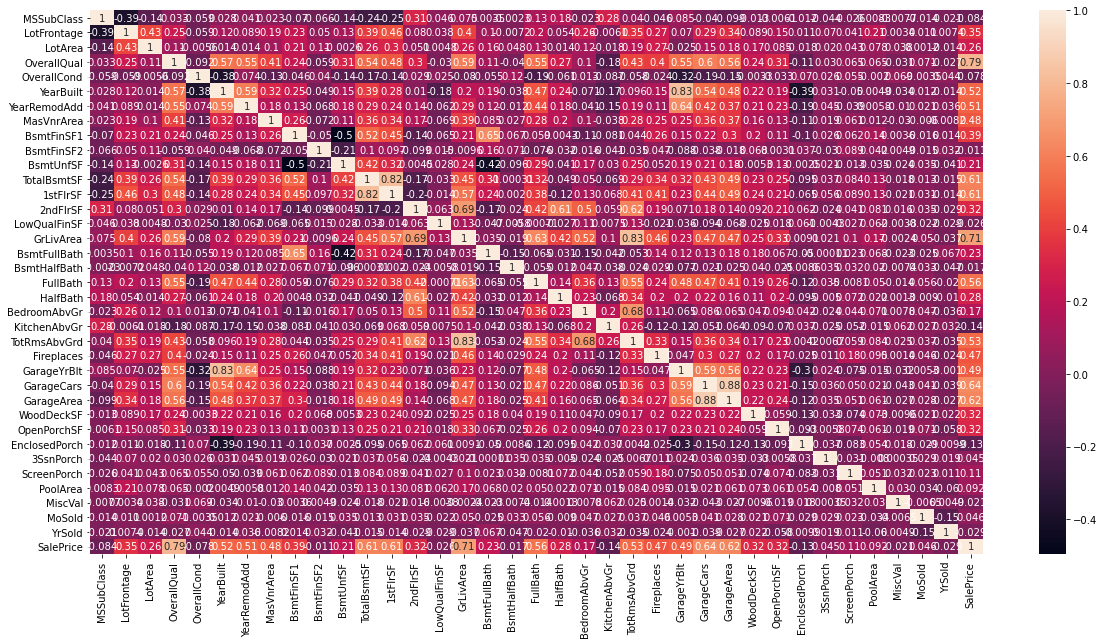

In [1442]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical.corr(),  annot=True)

#### Comments :
 Some features have have high correlation with each other(more than 0.6):

- GarageYrBlt with YearBuilt

- GarageYrBlt with YearRemodAdd

- 1stFlrSF with TotalBsmtSF

- GarageArea with GarageCars

- TotRmsAbvGrd with GrLivArea

- 1stFlrSF with GrLivArea

- BedroomAbvGr with TotRmsAbvGrd

- TotRmsAbvGrd with 2ndFlrSF

##### So it is better to drop one feature from each of these.

##### Also we can see, some columns have a correlation score above 0.5 with SalePrice which is a good indication of using as predictors. Let's see these columns and plot them against SalePrice:



In [1443]:
numerical.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [1444]:
highest_corr_features= df.corr().index[abs(df.corr()["SalePrice"])>0.5]
highest_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

### Features having correlation above 0.5 with Target Variable -
- 'OverallQual', 
- 'YearBuilt', 
- 'YearRemodAdd',
- 'TotalBsmtSF', 
- '1stFlrSF',
- 'GrLivArea', 
- 'FullBath', 
- 'TotRmsAbvGrd', 
- 'GarageCars', 
- 'GarageArea',
- 'SalePrice'

#### Scatter Plot - 
SalesPrice VS OverallQual,  GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrd, 1stFlrSF,  GarageCars     
  

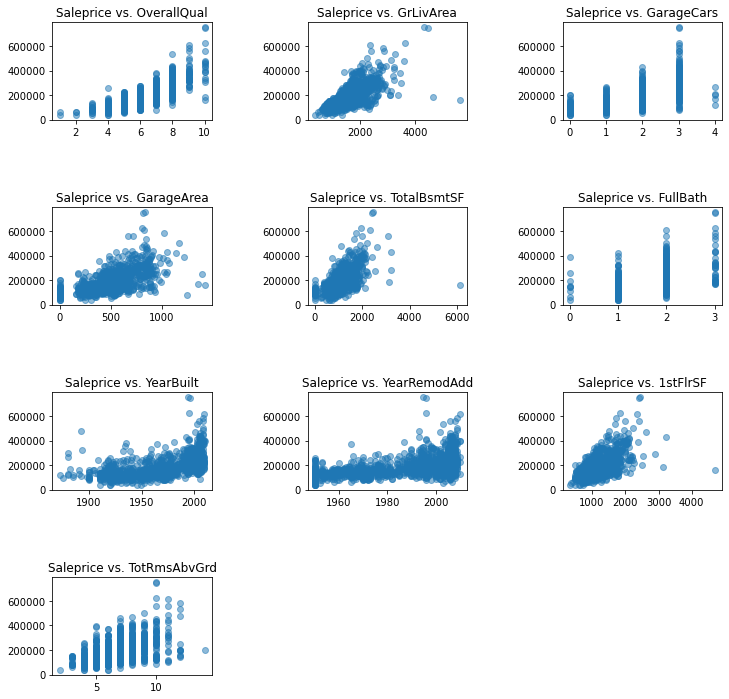

In [1445]:
var_ind = [16,45,60, 61,37,48,18,19,42,53,]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.9, wspace = 0.6)
for i in range(1,11):
    a = plot.add_subplot(4,3 , i)
    a.scatter(x = df.iloc[: , var_ind[i - 1]], y = df.iloc[: , 79], alpha = 0.5)
    a.title.set_text('Saleprice vs. ' +  df.columns[var_ind[i - 1]])

### #Outlier Analysis

#### BoxPlot - For Numerical Variables (highly correlated with Salesprice)

SalePrice,
OverallQual, GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrd, 1stFlrSF, GarageCars

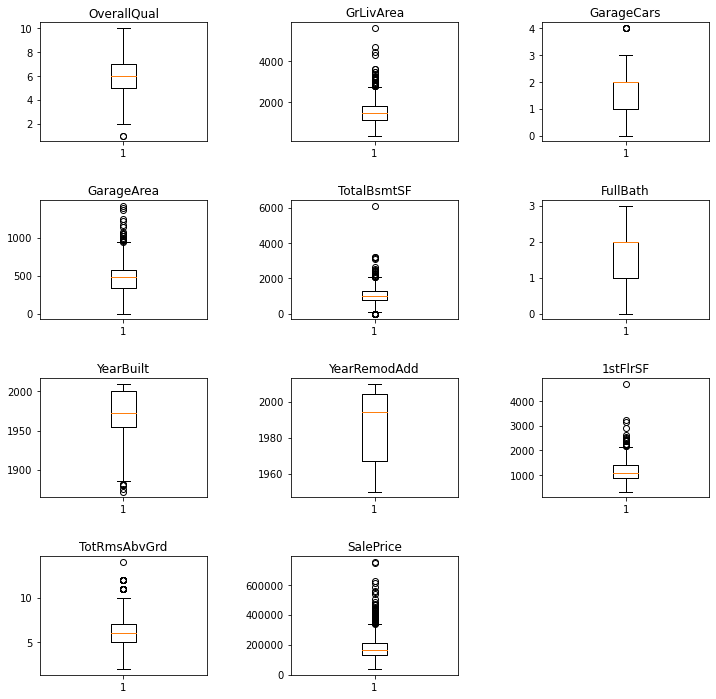

In [1446]:
l = [16,45,60, 61,37,48,18,19,42,53,79]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 12):
    a = plot.add_subplot(4, 3, i)
    a.boxplot(df.iloc[: , l[i - 1]])
    a.title.set_text(df.columns[l [i - 1]])

In [1447]:
#Let's see the outliers percentage in above column
for k, v in  df.iloc[: , l].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df.iloc[: , l])[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column OverallQual outliers = 1.58%
Column GrLivArea outliers = 2.12%
Column GarageCars outliers = 0.34%
Column GarageArea outliers = 1.44%
Column TotalBsmtSF outliers = 4.18%
Column FullBath outliers = 0.00%
Column YearBuilt outliers = 0.62%
Column YearRemodAdd outliers = 0.00%
Column 1stFlrSF outliers = 1.37%
Column TotRmsAbvGrd outliers = 5.34%
Column SalePrice outliers = 4.18%


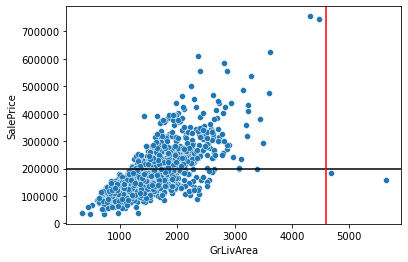

In [1448]:
#outlier between SalePrice and GrLivArea
sns.scatterplot(data=df , x='GrLivArea',y='SalePrice')
plt.axhline(y=200000, color='black')
plt.axvline(x=4600, color='red')

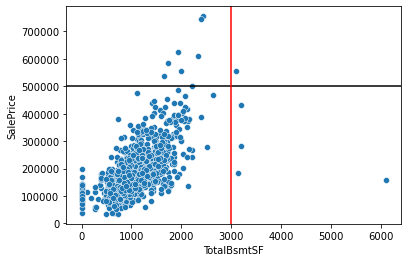

In [1449]:
#outlier between SalePrice and TotalBsmtSF
sns.scatterplot(data=df , x='TotalBsmtSF',y='SalePrice')
plt.axhline(y=500000, color='black')
plt.axvline(x=3000, color='red')

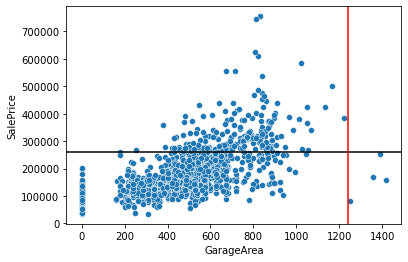

In [1450]:
#outlier between SalePrice and GarageArea
sns.scatterplot(data=df , x='GarageArea',y='SalePrice')
plt.axhline(y=260000, color='black')
plt.axvline(x=1240, color='red')

As we can see there are some outiers in these features.

#### BoxPlot - SalePrice VS Categorical Variables

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


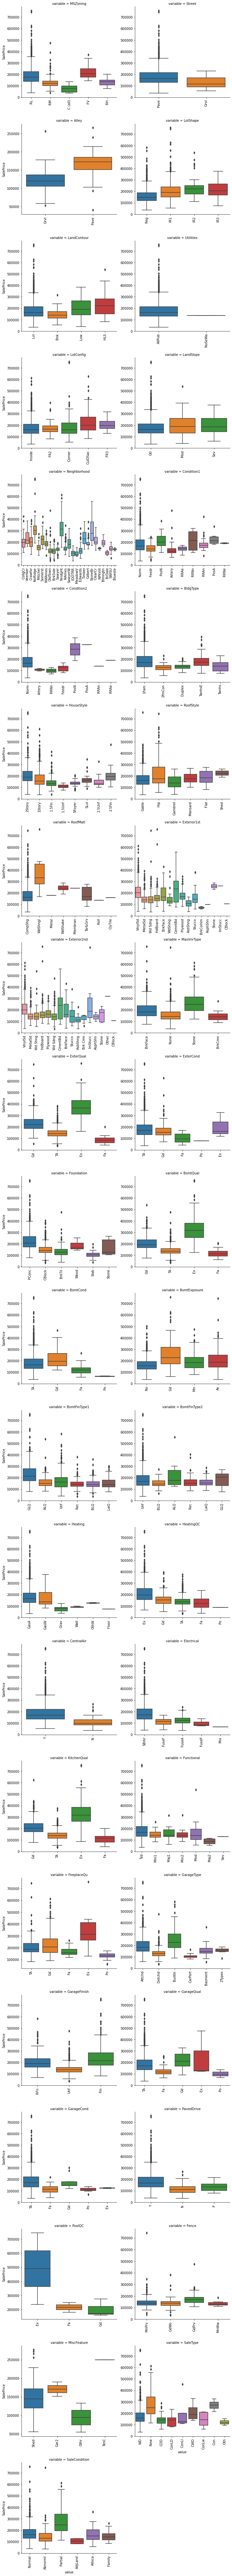

In [1451]:
for c in categorical:
    df_2[c] = df_2[c].astype('category')
    if df_2[c].isnull().any():
        df_2[c] = df_2[c].cat.add_categories(['MISSING'])
        df_2[c] = df_2[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.

### #Normality Analysis

### HistPlot - 

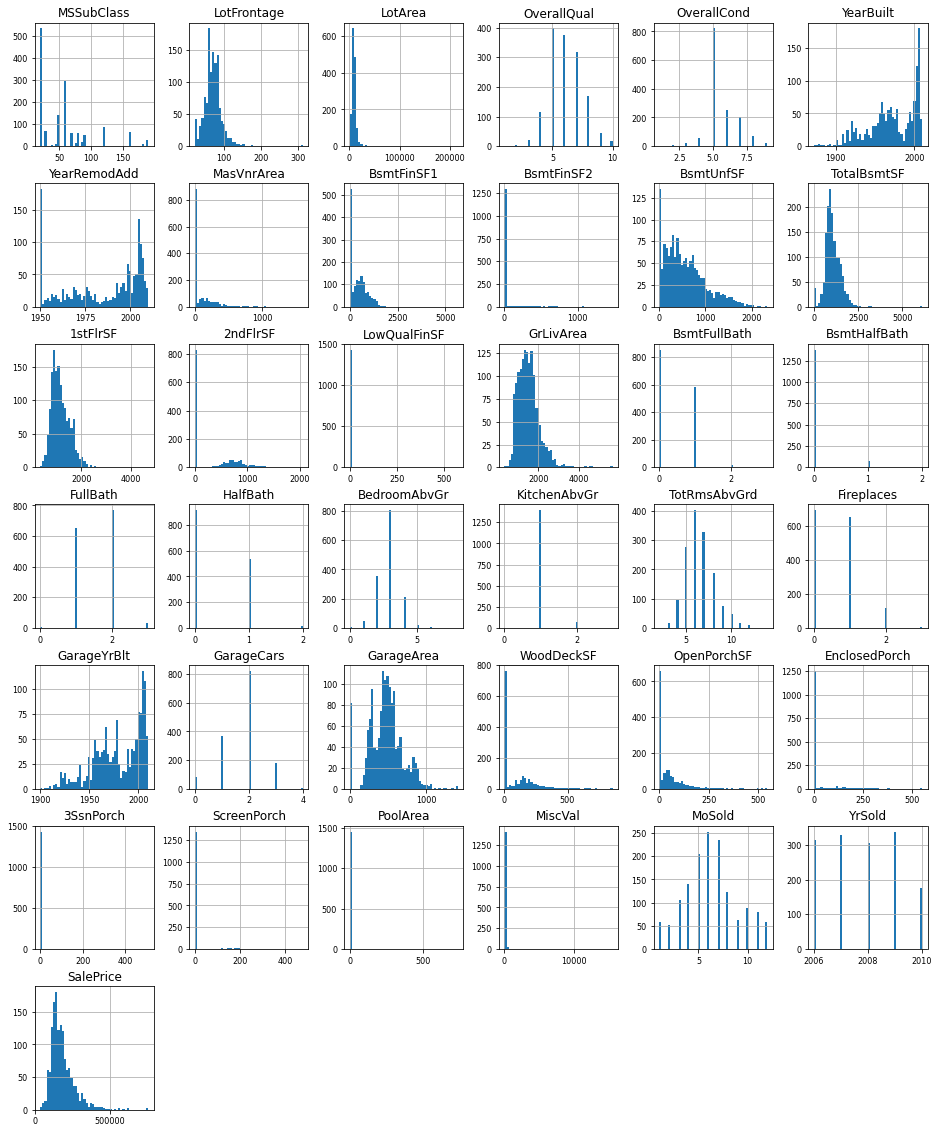

In [1452]:
numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### DistPlot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

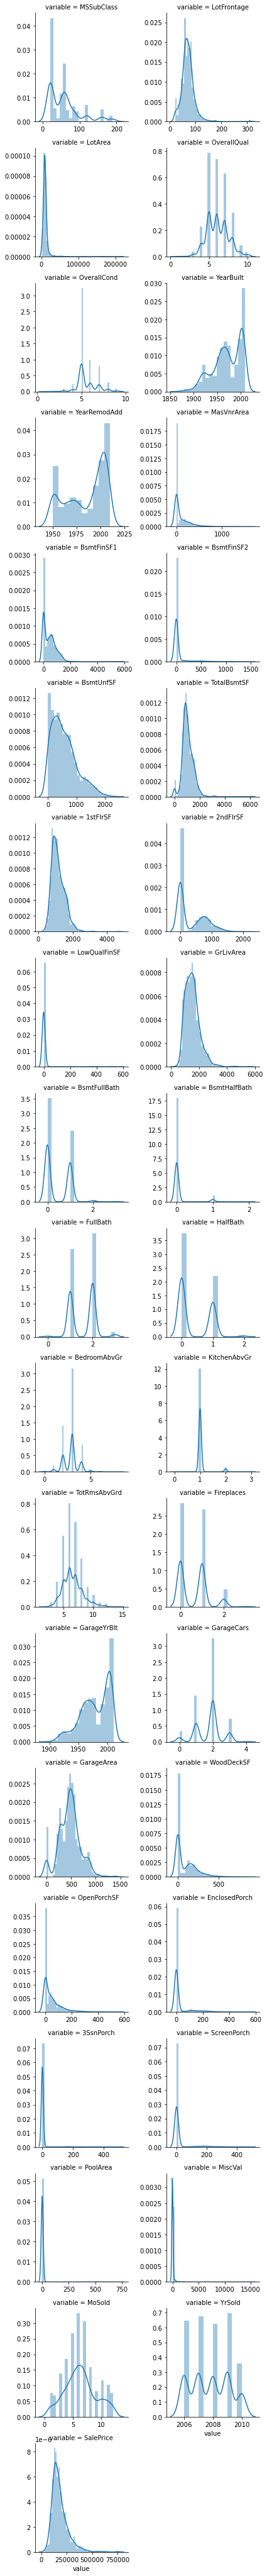

In [1453]:
f = pd.melt(df, value_vars= numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

 None of quantitative variables has normal distribution so these should be transformed as well.

### #Target Variable Analysis

### Pairplot - SalesPrice VS Numerical Variables

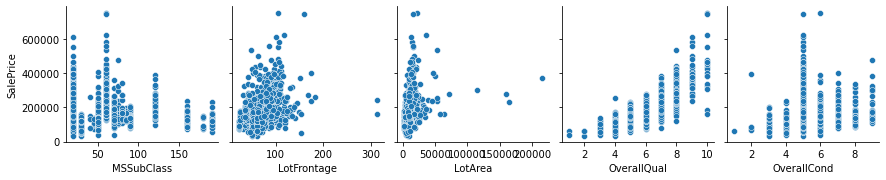

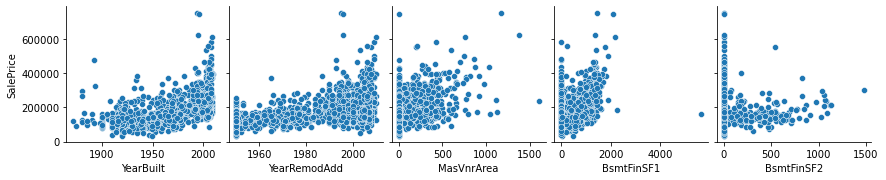

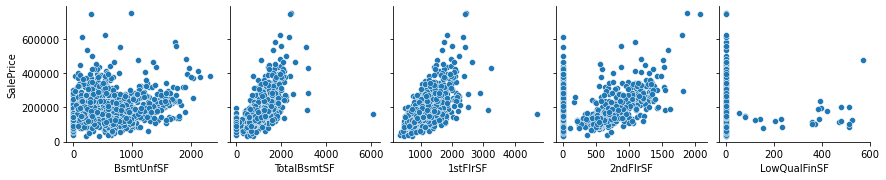

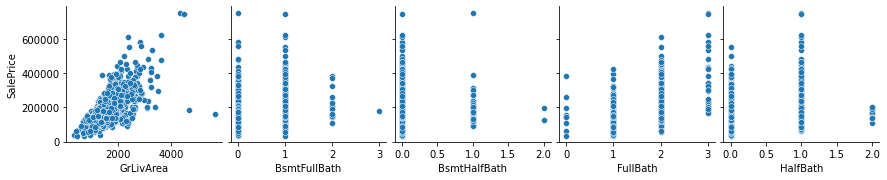

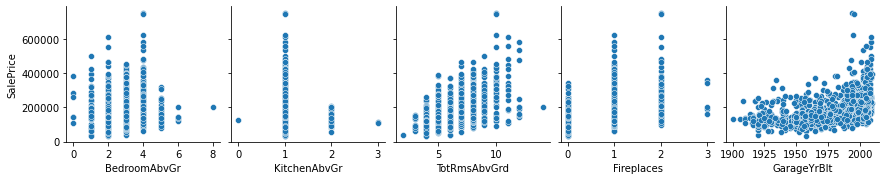

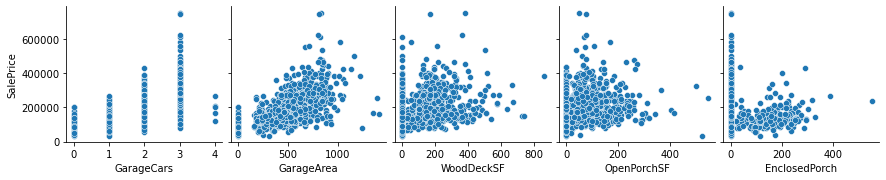

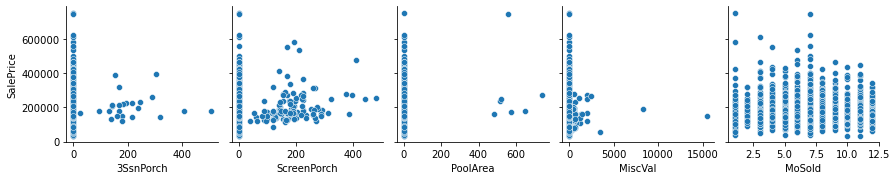

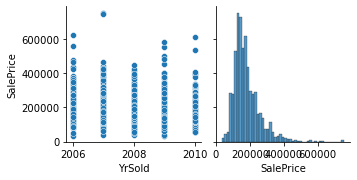

In [1454]:
for i in range(0, len(numerical.columns), 5):
    sns.pairplot(data=numerical,
                x_vars=numerical.columns[i:i+5],
                y_vars=['SalePrice'])


### Step 2. Data Cleaning - 



### 1. Checking the amount of Na/null values present in Dataset - 

In [1455]:
#Checking if null values
print(df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [1456]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(60)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageCond       0.06
GarageQual       0.06
GarageType       0.06
GarageFinish     0.06
GarageYrBlt      0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
MSSubClass       0.00
Fireplaces       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
Functional       0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
BsmtFullBath     0.00
CentralAir       0.00
LowQualFin

#### Missing Value Treatment - 1

Considering 50% as my threshold and dropping the column having more then the threshold

In [1457]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values > 0.50]

Alley          0.94
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

#### Comment - 1
Dropping these variables as they have more than 50% of their data NA/null and even these features have correlation less than 0.5 and are not important.

In [1458]:
# Dropping
df = df.drop(["Alley","PoolQC","Fence","MiscFeature"], axis = 'columns')

In [1459]:
df.shape

(1460, 76)

#### Comment -2 
We can see there are numerical variables like YearBuilt, YearRemodAdd, GarageYrBlt, YrSold can be converted to age columns with the help of their Year values. The max year for all these columns is 2010 ,So  suppose the 
##### YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10
After Conversion we will drop the original columns.

##### Year to age : 

In [1460]:
df['House_age'] = df.YearBuilt.max() - df.YearBuilt
df["House_remod_age"] = df.YearRemodAdd.max() - df.YearRemodAdd
df["Sold_Years"] = df.YrSold.max() - df.YrSold
df["Garage_Age"] = df.GarageYrBlt.max() - df.GarageYrBlt
df[["YearBuilt","House_age","YearRemodAdd","House_remod_age","YrSold","Sold_Years","GarageYrBlt","Garage_Age"]]

,YearBuilt,House_age,YearRemodAdd,House_remod_age,YrSold,Sold_Years,GarageYrBlt,Garage_Age
0,2003,7,2003,7,2008,2,2003.0,7.0
1,1976,34,1976,34,2007,3,1976.0,34.0
2,2001,9,2002,8,2008,2,2001.0,9.0
3,1915,95,1970,40,2006,4,1998.0,12.0
4,2000,10,2000,10,2008,2,2000.0,10.0
...,...,...,...,...,...,...,...,...
1455,1999,11,2000,10,2007,3,1999.0,11.0
1456,1978,32,1988,22,2010,0,1978.0,32.0
1457,1941,69,2006,4,2010,0,1941.0,69.0
1458,1950,60,1996,14,2010,0,1950.0,60.0


#### Date time treatment:

In [1461]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [1462]:
df.loc[:,'MoSold'] = df['MoSold'].astype(str)
df.loc[df['MoSold'].str.len()<2,'MoSold'] = '0' + df['MoSold']

In [1463]:
df['MoSold']

0       02
1       05
2       09
3       02
4       12
        ..
1455    08
1456    02
1457    05
1458    04
1459    06
Name: MoSold, Length: 1460, dtype: object

In [1464]:
df.loc[:,'DateSold'] = pd.to_datetime('01-'+df['MoSold'] +'-'+ df['YrSold'].astype(str))

In [1465]:
df['DateSold']

0      2008-01-02
1      2007-01-05
2      2008-01-09
3      2006-01-02
4      2008-01-12
          ...    
1455   2007-01-08
1456   2010-01-02
1457   2010-01-05
1458   2010-01-04
1459   2008-01-06
Name: DateSold, Length: 1460, dtype: datetime64[ns]

In [1466]:
# Dropping columns
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis='columns')

In [1467]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [1468]:
df.shape

(1460, 76)

#### Missing Value Treatment - 2

In [1469]:
#Checking Missing values less than 50% data
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.00]

LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
FireplaceQu     0.47
GarageType      0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
Garage_Age      0.06
dtype: float64

As we can see the mean is bigger than median for "LotFrontage" column so we can say this column is positively skewed so imputing it with median.

In [1470]:
# Describing the column
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1471]:
lfmed = df.LotFrontage.median()
df["LotFrontage"] = df["LotFrontage"].fillna(lfmed)

"MasVnrType" is a categorical column hence imputing Na/null values with mode.

In [1472]:
df.MasVnrType.mode()

0    None
dtype: object

In [1473]:
# For MasVnrType
df["MasVnrType"] = df["MasVnrType"].fillna("None")

As we can see the data of "MasVnrArea" column having mean is bigger than median hence it is positively skewed so we can impute it with median.

In [1474]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1475]:
Mvnramed = df.MasVnrArea.median()
df["MasVnrArea"] = df["MasVnrArea"].fillna(Mvnramed)

"BsmtQual" is a categorical column hence imputing Na/null values with mode.

In [1476]:
df.BsmtQual.mode()

0    TA
dtype: object

In [1477]:
# For BsmtQual
df["BsmtQual"] = df["BsmtQual"].fillna("TA")

'BsmtCond' is a categorical column hence imputing Na/null values with mode.

In [1478]:
df.BsmtCond.mode()

0    TA
dtype: object

In [1479]:
# For BsmtCond
df["BsmtCond"] = df["BsmtCond"].fillna("TA")

'BsmtExposure' is a categorical column hence imputing Na/null values with mode.

In [1480]:
df.BsmtExposure.mode()

0    No
dtype: object

In [1481]:
# For BsmtExposure
df["BsmtExposure"] = df["BsmtExposure"].fillna("No")

"BsmtFinType1" is a categorical column hence imputing Na/null values with mode.

In [1482]:
df.BsmtFinType1.mode()

0    Unf
dtype: object

In [1483]:
# For BsmtFinType1
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("Unf")

"BsmtFinType2" is a categorical column hence imputing Na/null values with mode.

In [1484]:
df.BsmtFinType2.mode()

0    Unf
dtype: object

In [1485]:
# For BsmtFinType2
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("Unf")

"FireplaceQu" is a categorical column hence imputing Na/null values with mode.

In [1486]:
df.FireplaceQu.mode()

0    Gd
dtype: object

In [1487]:
#For FireplaceQu
df["FireplaceQu"] = df["FireplaceQu"].fillna("Gd")

'GarageType' is a categorical column hence imputing Na/null values with mode.

In [1488]:
 df.GarageType.mode()

0    Attchd
dtype: object

In [1489]:
# For GarageType
df["GarageType"] = df["GarageType"].fillna("Attchd")

"GarageFinish" is a categorical column hence imputing Na/null values with mode.

In [1490]:
df.GarageFinish.mode()

0    Unf
dtype: object

In [1491]:
# For GarageFinish
df["GarageFinish"] = df["GarageFinish"].fillna("Unf")

"GarageQual" is a categorical column hence imputing Na/null values with mode.

In [1492]:
df.GarageQual.mode()

0    TA
dtype: object

In [1493]:
# For GarageQual
df["GarageQual"] = df["GarageQual"].fillna("TA")

"GarageCond" is a categorical column hence imputing Na/null values with mode.

In [1494]:
df.GarageCond.mode()

0    TA
dtype: object

In [1495]:
# For GarageCond
df["GarageCond"] = df["GarageCond"].fillna("TA")

"Garage_Age" is a derived column which describes number of years of Garage and it has same amount of null values as different Garage variables are. As from Data dictionary we can say Na = "No Garage" means no Garage built so imputing -1 for NA's available in Garage. 

In [1496]:
# For Garage_Age
df["Garage_Age"] = df["Garage_Age"].fillna(-1)

"Electrical" is a categorical column hence imputing the Na/null values with mode.

In [1497]:
df.Electrical.mode()

0    SBrkr
dtype: object

In [1498]:
# For Electrical
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [1499]:
df.shape

(1460, 76)

In [1500]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

### 2. Outliers Treatment - 

In [1501]:
df.describe([0.25,0.50,0.75])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_age,House_remod_age,Sold_Years,Garage_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,2.184247,29.691096
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,1.328095,25.121824
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,1.000000,7.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,2.000000,25.500000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,3.000000,48.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,4.000000,110.000000


#### Comment - 3
After Removing Nan/Missing values from columns we can see Outliers as well. So capping them lower and upper quantile as 0.25 & 0.99 respectively.

In [1502]:
numerical_2= df.select_dtypes(exclude=['object'])

In [1503]:
def outliers_remove(x):
    list = []
    for col in numerical_2:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.98)
        IQR = Q3 - Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   
df = outliers_remove(df)

In [1504]:
df.shape

(1385, 76)

### 3. Dropping columns as per their usage and variance -

 While analysing variance in variables, 'Street' & 'Utilities' have the lowest valrience hence dropping these columns

In [1505]:
df.Street.value_counts()
df.Utilities.value_counts()
df = df.drop(['Street','Utilities'],axis='columns')

In [1506]:
df.shape

(1385, 74)

### 4. Dropping variables - 

In [1507]:
# Highly skewed categorical variables needs to be dropped :
cat_col = df.select_dtypes(include=['object'])
column_skewed = []
for col in (cat_col):
    if(df[col].value_counts().max() >= 1241):
        column_skewed.append(col)
column_skewed

['LandContour',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [1508]:
df = df.drop(['LandContour',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive'], axis = "columns")

In [1509]:
df.shape

(1385, 62)

In [1510]:
# Removing one of the high correlated from pairs checked using heatmap
df.drop([ '1stFlrSF', 'TotRmsAbvGrd','GarageCars','Garage_Age'],  axis = 1, inplace = True)
df.shape

(1385, 58)

### Step 3. Labell Encoding and One Hot Encoding -

In [1511]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0, 'None': 0})
df['d_ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['d_HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['d_BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})


In [1512]:
df.shape

(1385, 74)

In [1513]:
# Dropping the old columns as we have new derieved column
df = df.drop(['LotShape','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu',
              'GarageFinish', 'BldgType','HouseStyle','LotConfig','MasVnrType','SaleCondition','ExterCond','HeatingQC','BsmtFinType2' ], axis = 'columns')

In [1514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MSSubClass       1385 non-null   int64         
 1   MSZoning         1385 non-null   object        
 2   LotFrontage      1385 non-null   float64       
 3   LotArea          1385 non-null   int64         
 4   Neighborhood     1385 non-null   object        
 5   Condition1       1385 non-null   object        
 6   OverallQual      1385 non-null   int64         
 7   OverallCond      1385 non-null   int64         
 8   RoofStyle        1385 non-null   object        
 9   Exterior1st      1385 non-null   object        
 10  Exterior2nd      1385 non-null   object        
 11  MasVnrArea       1385 non-null   float64       
 12  Foundation       1385 non-null   object        
 13  BsmtFinSF1       1385 non-null   int64         
 14  BsmtFinSF2       1385 non-null   int64  

In [1515]:
obj = df.columns[df.dtypes=='O'].to_list()
df = pd.get_dummies(data = df, columns=obj, drop_first = True)

In [1516]:
df.shape

(1385, 137)

In [1517]:
df2 = df.copy()
corr_vals = df2[df2.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False)

In [1518]:
df[['OverallQual','SalePrice']].corr()

,OverallQual,SalePrice
OverallQual,1.00000,0.80555
SalePrice,0.80555,1.00000


In [1519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Columns: 137 entries, MSSubClass to SaleType_WD
dtypes: datetime64[ns](1), float64(2), int64(46), uint8(88)
memory usage: 660.0 KB


### EDA Conclusion - 
- Variables had skewed data.
- Target variable had outliers.
- Most variables correlate well with target variable.
- Highest correlating variables (correlation >0.6) are overall quality, ground living area, d_ExterQual, d_KitchenQual and d_BsmtQual, TotalBsmtSF GarageArea.

### Step 4 : Train Test Split

In [1520]:
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)

# Putting response variable to y

y = df['SalePrice']


In [1521]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df.drop(['DateSold'], axis = 1), train_size = 0.7, random_state = 100)

### Step 5 : Scaling the features -

In [1522]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=136)

In [1523]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_train = train.pop('SalePrice')
X_train = train

y_test = test.pop('SalePrice')
X_test = test


### Step 6. Data Preparation for modelling -

In [1524]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [1525]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'BsmtFullBath', 'FullBath', 'Fireplaces', 'MSZoning_RH',
       'MSZoning_RL', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_PosN', 'RoofStyle_Gambrel', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_New'],
      dtype='object')

In [1526]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'SaleType_CWD',
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=105)

In [1527]:
X_train_new = X_train[X_train.columns[rfe.support_]]

In [1528]:
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.ranking_)), columns=['Variable', 'rfe_ranking'])
temp_df.reset_index(drop=True, inplace=True)

temp_df.sort_values('rfe_ranking').head(30)

,Variable,rfe_ranking
19,Fireplaces,1
65,Neighborhood_NoRidge,1
66,Neighborhood_NridgHt,1
112,Exterior2nd_Stone,1
113,Exterior2nd_Stucco,1
71,Neighborhood_Somerst,1
116,Exterior2nd_Wd Shng,1
72,Neighborhood_StoneBr,1
78,Condition1_PosN,1
120,Foundation_Stone,1


In [1529]:
# Using top 30 Columns to build a model for Grid Search
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [1530]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Step 7. Linear Regression -

In [1531]:
#Simple Linear Regression and RFE with top 30 ranking features
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1532]:
y_pred = lm.predict(X_train)
r_squared_train_lr = r2_score(y_train, y_pred)
r_squared_train_lr

0.7850842657147621

In [1533]:
y_pred = lm.predict(X_test)
r_squared_test_lr = r2_score(y_test, y_pred)
r_squared_test_lr

0.779273452102476

In [1534]:
# Metrics to assess model performance
rss_lr = np.sum(np.square(y_test - y_pred))
print(rss_lr)
mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)
rmse_lr = mse_lr**0.5
# Root Mean Squared Error
print(rmse_lr)

484037246608.6946
1163551073.5785928
34110.864450766894


In [1535]:
res = {"Liner Regression" : [r_squared_train_lr, r_squared_test_lr, rss_lr, mse_lr, rmse_lr, None]}

### Step 8. Ridge and Lasso -

In [1536]:
params = {'alpha': [1, 10, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 60.05,60.1, 60.2, 60.5, 61, 62, 63, 64, 66, 68, 70, 72, 74, 75]}

# params = {'alpha': [0.00001, 0.0000001, 0.5, 1]}


ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 50, 51, 52, 53, 54, 55, 56, 57, 58,
                                   59, 60, 60.05, 60.1, 60.2, 60.5, 61, 62, 63,
                                   64, 66, 68, 70, 72, 74, 75]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1537]:
ridge_model_cv.best_estimator_

Ridge(alpha=1)

In [1538]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
ridge_cv_results

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,1,-25025.588071,-26128.293275,1
1,10,-25578.979692,-26231.294795,2
2,50,-26824.144796,-27226.487791,3
3,51,-26844.210995,-27243.775337,4
4,52,-26864.045915,-27261.113984,5
5,53,-26883.714005,-27278.066782,6
6,54,-26903.216760,-27294.747339,7
7,55,-26922.343364,-27311.189833,8
8,56,-26941.178089,-27327.386281,9
9,57,-26959.693092,-27343.186829,10


In [1539]:
ridge = Ridge(alpha=(ridge_model_cv.best_estimator_.alpha))

ridge.fit(X_train, y_train)
ridge.coef_

array([ 25870.81477236,  19667.50196555,  25469.48075336,  16794.18968991,
        13081.45375679,  22686.11774937,  22449.61958963,  80168.36750585,
        53794.64959895,  20160.75241351,  45051.48814462, -16149.33063842,
        20277.67084495,  16081.52523394,  32245.02376303,  10316.50974158,
        16455.24960207, -14193.66504821, -35410.29714665,  35794.45525529,
        19677.8204695 ,   8881.10235539,  26574.80577841, -19812.14462404,
       -14664.85424689, -36486.69875751,  11538.43361934,  23768.65256153,
        16425.16964969,  28831.14304091])

In [1540]:
mean_squared_error(y_test, ridge.predict(X_test))

1138156475.1438498

In [1541]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,25870.8148
1,BsmtFullBath,19667.5020
2,FullBath,25469.4808
3,Fireplaces,16794.1897
4,MSZoning_RH,13081.4538
5,MSZoning_RL,22686.1177
6,Neighborhood_Crawfor,22449.6196
7,Neighborhood_NoRidge,80168.3675
8,Neighborhood_NridgHt,53794.6496
9,Neighborhood_Somerst,20160.7524


In [1542]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [1543]:
# Method to get the coefficient values
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(15)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
4,Neighborhood_NoRidge,True,1,80168.3675
5,Neighborhood_NridgHt,True,1,53794.6496
6,Neighborhood_StoneBr,True,1,45051.4881
10,Exterior1st_Stone,True,1,35794.4553
7,RoofStyle_Shed,True,1,32245.0238
14,SaleType_New,True,1,28831.1430
11,Exterior2nd_CmentBd,True,1,26574.8058
0,OverallQual,True,1,25870.8148
1,FullBath,True,1,25469.4808
13,SaleType_Con,True,1,23768.6526


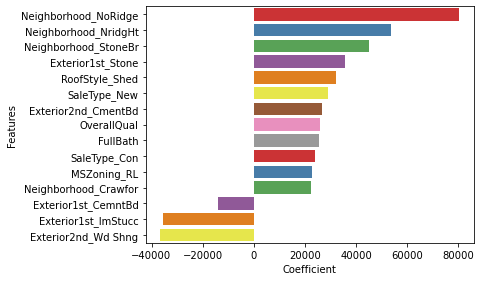

In [1544]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


In [1545]:
X_train_ridge = X_train[ridge_df.Features]
y_pred = lm.predict(X_train_ridge)
r_squared_train_ridge = r2_score(y_train, y_pred)
r_squared_train_ridge

0.7850842657147621

In [1546]:
X_test_ridge = X_test[ridge_df.Features]
y_pred = lm.predict(X_test_ridge)
r_squared_test_ridge = r2_score(y_test, y_pred)
r_squared_test_ridge

0.779273452102476

In [1547]:
# Metrics to assess model performance
rss_ridge = np.sum(np.square(y_test - y_pred))
print(rss_ridge)
mse_ridge = mean_squared_error(y_test, y_pred)
print(mse_ridge)
rmse_ridge = mse_ridge**0.5
# Root Mean Squared Error
print(rmse_ridge)

484037246608.6946
1163551073.5785928
34110.864450766894


In [1548]:
res.update({"Ridge" : [r_squared_train_ridge, r_squared_test_ridge, rss_ridge, mse_ridge, rmse_ridge, ridge_model_cv.best_estimator_.alpha]})

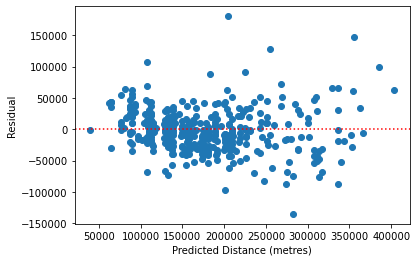

In [1549]:
residual = y_test - y_pred
plt.scatter( y_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


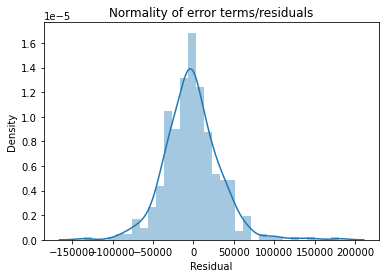

In [1550]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

#### Building Lasso Regression Model

In [1551]:
X_train.shape

(969, 30)

In [1552]:
lasso = Lasso()

# params = {'alpha': [(x/10000) for x in range(10,15)]}
params = {'alpha': [1, 1.15, 1.12, 1.1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 10, 100, 500, 600, 750, 1000, 50, 0.1, 0.04, 0.001, 0.0001, 0.00001]}
# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 1.15, 1.12, 1.1, 1.5, 2, 2.5, 3, 3.5, 4,
                                   5, 10, 100, 500, 600, 750, 1000, 50, 0.1,
                                   0.04, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1553]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(10)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,100,-25345.094998,-26086.642509,1
17,50,-25131.604909,-26198.044449,2
11,10,-24926.486700,-26280.805330,3
10,5,-24908.440792,-26297.058069,4
9,4,-24905.035924,-26301.161073,5
8,3.5,-24903.280361,-26303.527575,6
7,3,-24901.537810,-26305.906234,7
6,2.5,-24899.833654,-26308.308600,8
5,2,-24898.185203,-26310.719495,9
4,1.5,-24896.633420,-26313.234827,10


In [1554]:
lasso_model_cv.best_estimator_

Lasso(alpha=100)

In [1555]:
alpha = lasso_model_cv.best_estimator_.alpha

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 26570.30863984,  19119.44714872,  24458.39227633,  16808.95344918,
         1608.12330499,  21346.29210871,  17956.73211825,  77256.92704385,
        51552.78955423,  17499.93025708,  40414.46394164,  -8608.67741677,
         3765.80218809,      0.        ,      0.        ,      0.        ,
        11815.56212259,      0.        ,     -0.        ,      0.        ,
         2571.61393596,      0.        ,  11524.30159548,     -0.        ,
           -0.        , -31466.61328164,      0.        ,      0.        ,
            0.        ,  27794.39777244])

In [1556]:
mean_squared_error(y_test, lasso.predict(X_test))

1113920281.7224529

In [1557]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,26570.3086
1,BsmtFullBath,19119.4471
2,FullBath,24458.3923
3,Fireplaces,16808.9534
4,MSZoning_RH,1608.1233
5,MSZoning_RL,21346.2921
6,Neighborhood_Crawfor,17956.7321
7,Neighborhood_NoRidge,77256.9270
8,Neighborhood_NridgHt,51552.7896
9,Neighborhood_Somerst,17499.9303


In [1558]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1559]:
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
4,Neighborhood_NoRidge,True,1,77256.927044
5,Neighborhood_NridgHt,True,1,51552.789554
6,Neighborhood_StoneBr,True,1,40414.463942
9,SaleType_New,True,1,27794.397772
0,OverallQual,True,1,26570.308640
2,FullBath,True,1,24458.392276
1,BsmtFullBath,True,1,19119.447149
3,Neighborhood_Crawfor,True,1,17956.732118
7,RoofStyle_Gambrel,True,1,3765.802188
8,Exterior2nd_Wd Shng,True,1,-31466.613282


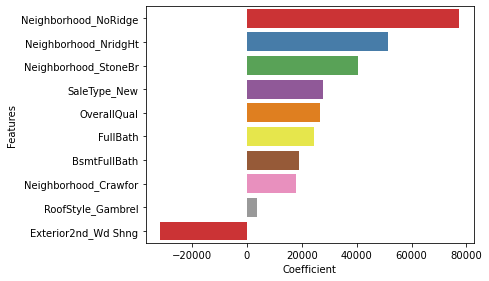

In [1560]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

In [1561]:
y_pred = lasso.predict(X_train)
r_squared_train_lasso = r2_score(y_train, y_pred)
r_squared_train_lasso

0.7789359385872678

In [1562]:
y_pred = lasso.predict(X_test)
r_squared_test_lasso = r2_score(y_test, y_pred)
r_squared_test_lasso

0.7886884521008292

In [1563]:
# Metrics to assess model performance
rss_lasso = np.sum(np.square(y_test - y_pred))
print(rss_lasso)
mse_lasso = mean_squared_error(y_test, y_pred)
print(mse_lasso)
rmse_lasso = mse_lasso**0.5
# Root Mean Squared Error
print(rmse_lasso)

463390837196.5404
1113920281.7224529
33375.44429251022


In [1564]:
res.update({"Lasso" : [r_squared_train_lasso, r_squared_test_lasso, rss_lasso, mse_lasso, rmse_lasso, lasso_model_cv.best_estimator_.alpha]})

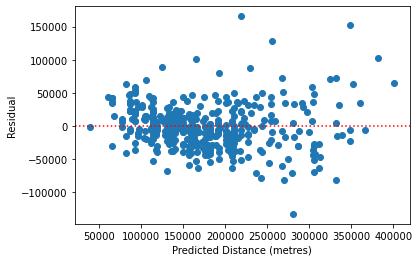

In [1565]:
residual = y_test - y_pred
plt.scatter( y_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


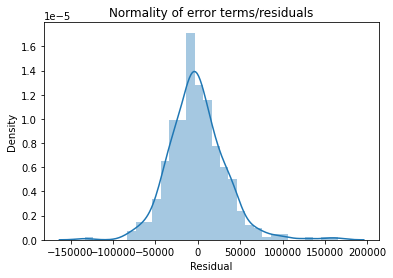

In [1566]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

### Step 9: Conclusion and Results

In [1567]:
result = pd.DataFrame(res).T
result.columns =['R2_Train', 'R2_Test', 'RSS', 'MSE', 'RMSE', 'Alpha']

In [1568]:
result

,R2_Train,R2_Test,RSS,MSE,RSME,Alpha
Liner Regression,0.785084,0.779273,4.840372e+11,1.163551e+09,34110.864451,NaN
Ridge,0.785084,0.779273,4.840372e+11,1.163551e+09,34110.864451,1.0
Lasso,0.778936,0.788688,4.633908e+11,1.113920e+09,33375.444293,100.0


#### As we can see, there is a slight increase in RMSE for Lasso. Here with regulaization, we can ensure that there is no overfitting of data.